/Users/Farid/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Farid/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Farid/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


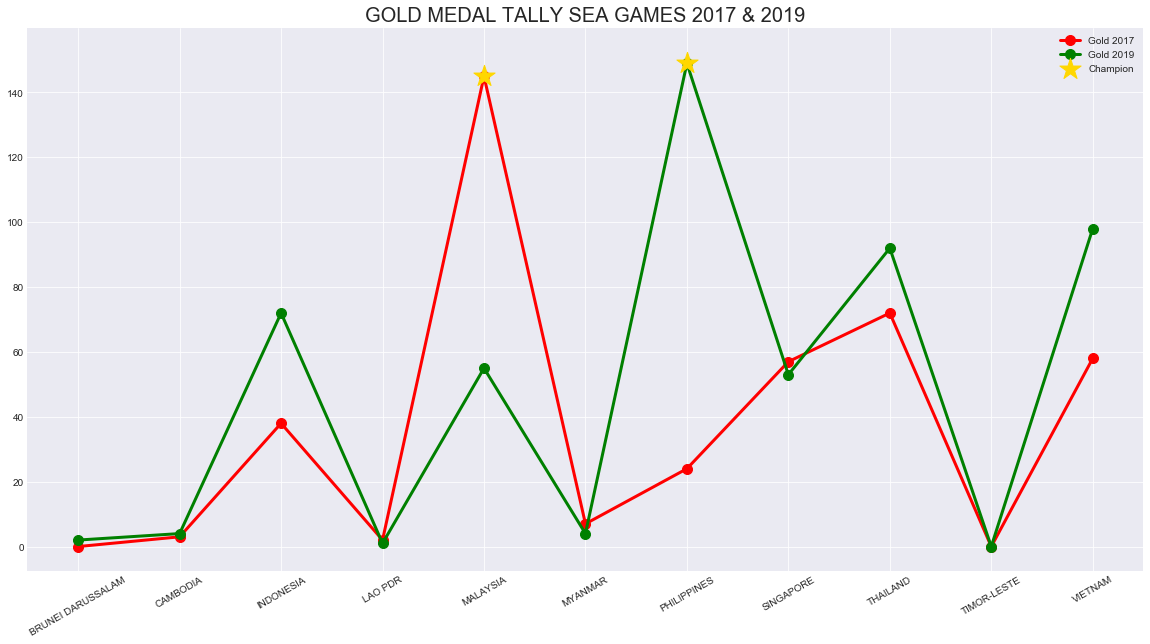

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

url_2017='https://www2.2019seagames.com/countries/'
# url_2019='https://www2.2019seagames.com/countries/'
plt.style.use('seaborn-darkgrid')
req_2017=requests.get(url_2017)
df_2019=pd.read_html('/Users/Farid/Dropbox/JCDS/Module 02/ujian/Soal 03/framesource.html')
# df_2019=df_2019[0]
bs=BeautifulSoup(req_2017.content, 'html.parser')

test=bs.find_all('em')
new_arr=[]
for i in test:
    i=i.text
    if "Gold: " in i:
        i=i.replace("Gold: ",'')
    new_arr.append(i)
country=[]
total_medal=[]

for i in range(11):
    country.append(new_arr[i*6])
    index=new_arr.index(country[i])
    total_medal.append(int(new_arr[index+2]))

df=pd.DataFrame({
    "negara": country,
    "total_medali_emas": total_medal
})

df=df.sort_values(by='negara')
df_2019=df_2019[0].sort_values(by='Contingent')
df['negara'][3] = 'LAO PDR'
df['negara'][0] = 'BRUNEI DARUSSALAM'
df['negara'][9] = 'TIMOR-LESTE'
top_df1 = df[df['total_medali_emas'] == df['total_medali_emas'].max()][['negara','total_medali_emas']]
top_df2 = df_2019[df_2019['Gold'] == df_2019['Gold'].max()][['Contingent', 'Gold']]
new_df=pd.DataFrame({
    "negara":[top_df1['negara'][4], top_df2['Contingent'][0]],
    "gold": [top_df1['total_medali_emas'][4], top_df2['Gold'][0]]
})
fig=plt.figure(figsize=(20,10))

plt.plot(df['negara'], df['total_medali_emas'], 'r', marker='o', markersize=10, label='Gold 2017', linewidth=3)
plt.plot(df_2019['Contingent'], df_2019['Gold'], 'g', marker='o', markersize=10,label='Gold 2019',linewidth=3)
plt.scatter(new_df['negara'], new_df['gold'], marker="*", color='gold', label="Champion", zorder=3, s=500)
plt.title("GOLD MEDAL TALLY SEA GAMES 2017 & 2019", fontsize=20)
plt.legend()
plt.xticks(rotation=30)
plt.show()

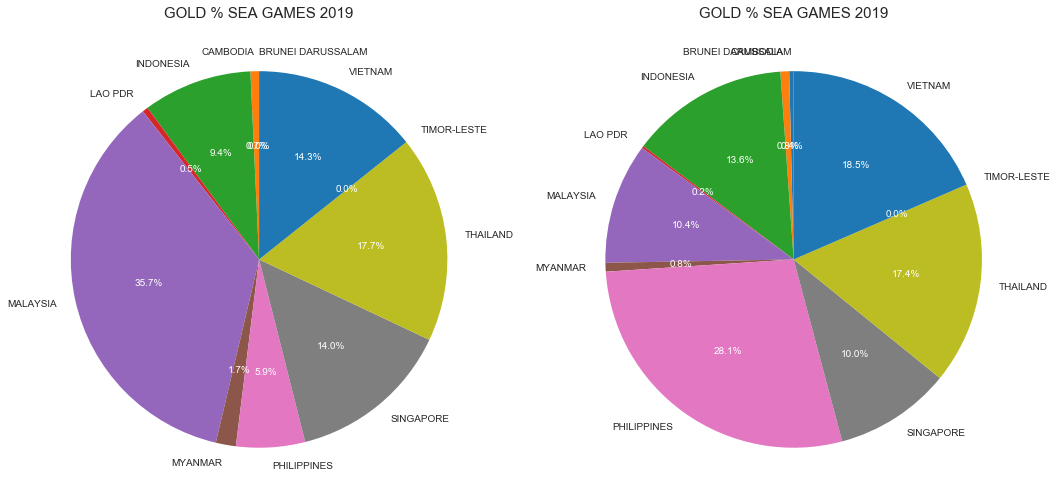

In [156]:
fig=plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("GOLD % SEA GAMES 2019", fontsize=15)
df['percentage'] = df['total_medali_emas']/df['total_medali_emas'].sum()
_, _, autotext1 = plt.pie(df['percentage'], labels=df['negara'],autopct='%1.1f%%', startangle=90)
for text in autotext1:
    text.set_color('white')

plt.subplot(122)
plt.title("GOLD % SEA GAMES 2019", fontsize=15)
df_2019['percentage'] = df_2019['Gold']/df_2019['Gold'].sum()
# df_2019
_, _, autotext2=plt.pie(df_2019['percentage'], labels=df_2019['Contingent'], autopct='%1.1f%%', startangle=90, )
for text in autotext2:
    text.set_color('white')
plt.tight_layout()
plt.show()

In [157]:
top_df1 = df[df['total_medali_emas'] == df['total_medali_emas'].max()][['negara','total_medali_emas']]

In [158]:
top_df2 = df_2019[df_2019['Gold'] == df_2019['Gold'].max()][['Contingent', 'Gold']]

In [159]:
top_df1['negara'][4]

In [0]:
new_df=pd.DataFrame({
    "negara":[top_df1['negara'][4], top_df2['Contingent'][0]],
    "gold": [top_df1['total_medali_emas'][4], top_df2['Gold'][0]]
})
new_df